In [3]:
from datascience import *
import numpy as np
path_data = '../../../assets/data/'
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [4]:
# As of August 2021, this census file is online here: 
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'

# A local copy can be accessed here in case census.gov moves the file:
# data = path_data + 'nc-est2019-agesex-res.csv'

full_census_table = Table.read_table(data)
#full_census_table

partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
#partial_census_table

us_pop = partial_census_table.relabeled('POPESTIMATE2014', '2014').relabeled('POPESTIMATE2019', '2019')

# Example: Sex Ratios

In this section we will continue using the `us_pop` table from the previous section. But this time we will focus on population trends in relation to the `SEX` column.

In [5]:
us_pop

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


## The Code Used in the `SEX` Column

The contents of the `AGE`, `2014`, and `2019` columns are straightforward to understand. The `AGE` column contains ages in completed years. The special value `999` represents the entire population regardless of age, and `100` represents "100 or more". The `2014` and `2019` columns contain estimates of the US population in each of the two years.

The SEX column, however, is more difficult to interpret. 
 
The Census form asks respondents to provide the sex of each household member by checking one of two boxes labeled Male and Female. The `SEX` column contains numeric codes: `1` for male, `2` for female, and `0` for the total.

This question has been asked in essentially the same way since 1790. But since then there has been considerable [research](https://pubmed.ncbi.nlm.nih.gov/11534012/) on whether the sex of human beings lends itself to simple binary categorization. For example, nonbinary people do not identify exclusively as male or female. A [study](https://williamsinstitute.law.ucla.edu/publications/nonbinary-lgbtq-adults-us/) by the Williams Institute at the UCLA School of Law in 2021 estimated that at least 1.2 million individuals in the United States identify as nonbinary. 

By continuing to use the historical form of the question, the Census fails to reflect the complexity of sex classification. The [explanation](https://www2.census.gov/programs-surveys/decennial/2020/partners/outreach-materials/handouts/why-we-ask-the-sex-question.pdf) provided in the 2020 Census and reproduced in the quotation below does not include instructions for those who do not identify as one of Male or Female.

> **Responding to the sex question is easy.**
>
>A question on sex has been included since the first census in 1790. All 2020 Census questions that involve personal characteristics are based on self-identification. When you complete your census, select the box for the biological sex you identify with.
>

Regardless of the opinion expressed above, responding to this question isn’t easy for everyone. Difficulties with answering the question can lead to non-response or inaccurate responses. This can reduce the accuracy of Census data for informing policy decisions and allocating resources.

Before the 2020 Census, the Census Bureau considered revising this question or including broader questions about sexual orientation and gender identity. In the end the Bureau decided [not to change](https://www.census.gov/newsroom/blogs/director/2017/03/planned_subjects_2020.html) the planned Census. 

However, Census Director John Thompson wrote, “The Census Bureau remains committed to reflecting the information needs of our changing society.” Census forms do change. For example, [new questions on race and ethnicity](https://www.census.gov/library/stories/2021/08/improved-race-ethnicity-measures-reveal-united-states-population-much-more-multiracial.html) in the 2020 Census have led to a more accurate understanding of US demographics. We can hope that the 2030 Census will be more inclusive and accurate in all respects. 

In what follows, we will use the data provided by the Census keeping in mind the issues described above. We will use the term "male" to mean an individual for whom "Male" (`SEX` code 1) was selected on the Census form. We will use "female" to mean an individual for whom "Female" (`SEX`code 2) was selected. 

## Overall Proportions
We will now begin looking at sex ratios in 2019. First, let's look at all the age groups together. Remember that this means looking at the rows where the "age" is coded 999. The table `all_ages` contains this information. There are three rows: one for the total population, one for males, and one for females.

In [6]:
us_pop_2019 = us_pop.drop('2014')
all_ages = us_pop_2019.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2019
0,999,328239523
1,999,161657324
2,999,166582199


Row 0 of `all_ages` contains the total U.S. population in each of the two years. The United States had about 330 million people in 2019.

Row 1 contains the counts for males and Row 2 for females. Compare these two rows to see that in 2019, there were more females than males in the United States. 

The population counts in Row 1 and Row 2 add up to the total population in Row 0. 

For comparability with other quantities, we will need to convert these counts to percents out of the total population. Let's access the total for 2019 and name it. Then, we'll show a population table with a proportion column. Consistent with our earlier observation that there were more females than males, 50.75% of the population in 2019 was female and about 49.25% was male. 

In [7]:
pop_2019 = all_ages.column('2019').item(0)
all_ages.with_column(
    'Proportion', all_ages.column('2019')/pop_2019
).set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,999,328239523,100.00%
1,999,161657324,49.25%
2,999,166582199,50.75%


## Proportions Among Infants

When we look at infants, however, the opposite is true. Let's define infants to be babies who have not yet completed one year, represented in the rows corresponding to `AGE` 0. Here are their numbers in the population. You can see that male infants outnumbered female infants.

In [8]:
infants = us_pop_2019.where('AGE', are.equal_to(0))
infants

SEX,AGE,2019
0,0,3783052
1,0,1935117
2,0,1847935


As before, we can convert these counts to percents out of the total numbers of infants. The resulting table shows that in 2019, just over 51% of infants in the U.S. were male. 

In [9]:
infants_2019 = infants.column('2019').item(0)
infants.with_column(
    'Proportion', infants.column('2019')/infants_2019
).set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,0,3783052,100.00%
1,0,1935117,51.15%
2,0,1847935,48.85%


In fact, it has long been observed that the proportion of males among newborns is slightly more than 1/2. The reason for this is not thoroughly understood, and [scientists are still working on it](http://www.npr.org/sections/health-shots/2015/03/30/396384911/why-are-more-baby-boys-born-than-girls).

## Sex Ratio at Each Age 

We have seen that while there are more male infants than female, there are more females than males in the population overall. That means the split between sexes must vary across age groups.

To study this variation, we will separate out the data for the females and the males, and eliminate the row where all the ages are aggregated and `AGE` is coded as 999.

The tables `females` and `males` contain the data for each the two sex codes.

In [10]:
females_all_rows = us_pop_2019.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females

SEX,AGE,2019
2,0,1847935
2,1,1871014
2,2,1916500
2,3,1955655
2,4,1976372
2,5,1967081
2,6,1964271
2,7,1966584
2,8,1986471
2,9,1988726


In [11]:
males_all_rows = us_pop_2019.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males

SEX,AGE,2019
1,0,1935117
1,1,1958585
1,2,2005544
1,3,2043010
1,4,2066951
1,5,2061200
1,6,2052956
1,7,2055735
1,8,2079723
1,9,2073148


The plan now is to compare the number of females and the number of males at each age, for each of the two years. Array and Table methods give us straightforward ways to do this. Both these tables have one row for each age.

In [12]:
males.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [13]:
females.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

For any given age, we can get the Female:Male sex ratio by dividing the number of females by the number of males. 

To do this in one step, we can use `column` to extract the array of female counts and the corresponding array of male counts, and then simply divide one array by the other. Elementwise division will create an array of sex ratios for all the years.

In [14]:
ratios = Table().with_columns(
    'AGE', females.column('AGE'),
    '2019 F:M RATIO', females.column('2019')/males.column('2019')
)
ratios

AGE,2019 F:M RATIO
0,0.954947
1,0.955289
2,0.955601
3,0.957242
4,0.956177
5,0.954338
6,0.956801
7,0.956633
8,0.955161
9,0.959278


You can see from the display that the ratios are all around 0.96 for children aged nine or younger. When the Female:Male ratio is less than 1, there are fewer females than males. Thus we are seeing that there were fewer girls than boys in each of the age groups 0, 1, 2, and so on through 9. More precisely, in each of these age groups there were about 96 girls for every 100 boys.

Then how can the overall proportion of females in the population be higher than the males? 

Something quite different happens when we examine the other end of the age range. Here are the Female:Male ratios for people aged more than 75.

In [15]:
ratios.where('AGE', are.above(75)).show()

AGE,2019 F:M RATIO
76,1.21422
77,1.23558
78,1.26373
79,1.28129
80,1.29209
81,1.32745
82,1.36101
83,1.39749
84,1.44603
85,1.48588


Not only are all of these ratios greater than 1, signifying more women than men in all of these age groups, many of them are considerably greater than 1. 

- At ages 92 and 93 the ratios are close to 2, meaning that there were about twice as many women as men at those ages in 2019.
- At ages 99 there were about 3 times as many women as men. 

If you are wondering how many people there were at these advanced ages, you can use Python to find out:

In [16]:
males.where('AGE', are.contained_in(make_array(92, 93, 99)))

SEX,AGE,2019
1,92,131684
1,93,103415
1,99,14596


In [17]:
females.where('AGE', are.contained_in(make_array(92, 93, 99)))

SEX,AGE,2019
2,92,262383
2,93,217370
2,99,42528


The graph below shows sex ratios plotted against age. The blue curve shows the 2019 ratios by age.

The ratios are almost 1 (signifying close to equal numbers of males and females) for ages 0 through 60. But they start shooting up dramatically (more females than males) starting in the 65 to 70 range.

That females outnumber males in the U.S. is partly due to the marked imbalance in favor of women among senior citizens.

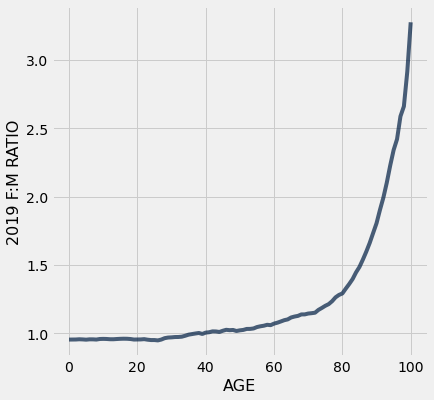

In [18]:
ratios.plot('AGE')